In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# OscFit path
sys.path.append('/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules')

In [3]:
import dataLoader, oscFit
reload(dataLoader)
import MCEqFlux

In [6]:
user = 'kpi_user_v1'
pid_start = 2.
pid_stop = np.inf
pid_array = np.array([-3, 2., np.inf])
sky_start = -1
sky_stop = 1
bins = 9

In [7]:
loader =  dataLoader.dataLoader(bin_edges   = [10**np.linspace(0.75,2.15,11),
                                               np.arccos(np.linspace(sky_start,sky_stop,bins))[::-1],
                                                   pid_array],
                                    observables = ['reco_energy', 'reco_zenith', 'delta_llh'],
                                    user = user,
                                    LEaxis = [],
                                    bkg_diff_is_syst = True,
                                    #user_init = [0],
                                    expected_years = 3,
                                    weight_keys = ['weight_e', 'weight_mu'],
                                    detsys_perflavor=False, # Calculate the detector variations per flavor
                                    legacy_detsys = False, # Calcualte the detector variations as in the PRD paper
                                    detailed_detsys=False, # Re-calculate the detector variations at each minimization step
                                    verbose = False)


 ************************************ 
 **** oscFit3D v1.0 - dataLoader ****
 ************************************
dataLoader: Initializing user kpi_user_v1


/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules/dataLoader.py:45: RuntimeWarning: divide by zero encountered in divide
  in_dict['LE'] = np.log10(propagationDistance(in_dict['reco_zenith'])/in_dict['reco_energy'])


dataLoader: MC loaded successfully!
dataLoader: Setting MCEq fluxes for all mc sets, including systematic variations
List of files used for atmmu_data estimation (with weight of 1):
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg2.IC86_2.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg2.IC86_3.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg2.IC86_4.11082016.pckl
List of files used for atmmu_new_data estimation (with weight of 1):
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg1.IC86_2.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg1.IC86_3.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg1.IC86_4.11082016.pckl
dataLoader: Muon background templates loaded successfully!
dataLoader: Loading systematic variations using default values.


/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules/systematicFunctions.py:46: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yvalues_bin = np.array(y_values[[[x]for x in one_index]][0])
/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules/systematicFunctions.py:47: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  werrors     = np.sqrt(np.array(y_valuesw2[[[x]for x in one_index]][0]))/yvalues_bin


In [8]:
import oscFit
reload(oscFit)

<module 'oscFit' from '/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules/oscFit.pyc'>

In [9]:
ref = loader.loadMCasData({'norm_nu':2.9})

dataLoader: atmmu_norm  0.07 , noise_norm 1.0


In [10]:
fitter = oscFit.fitOscParams()
data_loaders    = [loader]          # Here you could list many samples to be fit at once
data_histograms = [ref]  # The data histogram for each of the samples


 ************************************ 
 ****** oscFit3D v1.0 - oscFit ******
 ************************************


In [11]:
# The settings of the fit are given as [ini_value, fix?]
fit_settings    = {
    'simulation':     'baseline',      # This patches GENIE simulation with NuGen.
    'dm31':           [0.0025, False, 'NH'], # Need to specify the hierarchy of the fit
    'theta23':        [0.78, False],         # Not used in the "TwoNeutrino" mode
    'theta13':        [0.148, True],        # Not used in the "TwoNeutrino" mode
    'mix_angle':      [0.95, False, 1.4],     # Only used in the "TwoNeutrino" mode. Leave as is otherwise.
    'oscMode':        'TwoNeutrino',         # How do you want to fit the data?
    'oscTables':      False,
    'norm':           [1.0, True],
    'norm_e':         [1., True],
    'norm_tau':       [1., True],            # Set to false for nutau apperance studies
    'nu_nubar':       [1., True],
    'nubar_ratio':     [0., True],
    'uphor_ratio':    [0., True],

    'gamma':          [0.00, False],
    # New parameters
    'w_pi':           [0.01, False],
    'w_k':            [0.02, False],
    
    
    'axm_qe':         [0., True],
    'axm_res':        [0., False],
    'pid_bias':       [0., True],
    'hole_ice':       [0.02, True],
    'hi_fwd':         [0.0, True],

    'norm_nc':        [1., False],
    'domeff':         [1., True],
    'had_escale':     [1., True],
    'atmmu_f':        [0.06, False, 'new_data'],
    'noise_f':        [0.0, True],
#    'fix_norm_region':[1.7],
    'detector_syst':  True,
    'include_priors': True,
    'printMode':      -1}                  # Do you want to see every step MINUIT takes?

In [12]:
result_NH = fitter(data_histograms=data_histograms,
                data_loaders=data_loaders,
                fit_settings=fit_settings,
                #fit_priors = fit_priors,
                ncalls = 1000,
                do_chi2_fit = True,
                store_fit_details = True)

oscFit: Fitter running in TwoNeutrino mode
oscFit: 42509.02790338542  events in data
oscFit: Fitting in normal hierarchy mode
304.50157
oscFit: Testing the LLH2 function  304.5015682943058
Baseline LLH value given in settings:  0.0
oscFit: Fit settings
	noise_f 	[0.0, True]
	pid_bias 	[0.0, True]
	deltacp 	[0.0, True]
	hi_fwd 	[0.0, True]
	printMode 	-1
	oscMode 	TwoNeutrino
	include_priors 	True
	theta24 	[0.0, True]
	atmmu_f 	[0.06, False, 'new_data']
	w_k 	[0.02, False]
	theta23 	[0.78, False]
	uphor_ratio 	[0.0, True]
	detector_syst 	True
	theta34 	[0.0, True]
	w_pi 	[0.01, False]
	norm 	[1.0, True]
	axm_res 	[0.0, False]
	norm_tau 	[1.0, True]
	oscTables 	False
	nubar_ratio 	[0.0, True]
	dm41 	[0.0, True]
	norm_nc 	[1.0, False]
	domeff 	[1.0, True]
	hole_ice 	[0.02, True]
	dm31 	[0.0025, False, 'NH']
	nu_nubar 	[1.0, True]
	baseline_llh 	[0.0, True]
	had_escale 	[1.0, True]
	dm21 	[7.53e-05, True]
	mix_angle 	[0.95, False, 1.4]
	simulation 	baseline
	norm_e 	[1.0, True]
	axm_qe 	[

40.76170  +0.00257  +0.87289  +0.00291  -0.01854  +0.07473  +0.00511  +0.03812  +1.18366
40.76806  +0.00257  +0.87297  +0.00293  -0.01854  +0.07473  +0.00511  +0.03812  +1.18366
40.76219  +0.00257  +0.87297  +0.00288  -0.01854  +0.07473  +0.00511  +0.03812  +1.18366
40.76448  +0.00257  +0.87297  +0.00291  -0.01827  +0.07473  +0.00511  +0.03812  +1.18366
40.76576  +0.00257  +0.87297  +0.00291  -0.01882  +0.07473  +0.00511  +0.03812  +1.18366
40.76559  +0.00257  +0.87297  +0.00291  -0.01854  +0.07507  +0.00511  +0.03812  +1.18366
40.76466  +0.00257  +0.87297  +0.00291  -0.01854  +0.07438  +0.00511  +0.03812  +1.18366
40.77199  +0.00257  +0.87297  +0.00291  -0.01854  +0.07473  +0.00511  +0.03812  +1.18366
40.75824  +0.00257  +0.87297  +0.00291  -0.01854  +0.07473  +0.00510  +0.03812  +1.18366
40.76175  +0.00257  +0.87297  +0.00291  -0.01854  +0.07473  +0.00511  +0.03906  +1.18366
40.76849  +0.00257  +0.87297  +0.00291  -0.01854  +0.07473  +0.00511  +0.03718  +1.18366
40.76967  +0.00257  +

36.73502  +0.00260  +0.88231  -0.00558  -0.07590  +0.17761  +0.00002  +0.02359  +1.09597
36.73494  +0.00260  +0.88217  -0.00558  -0.07590  +0.17761  +0.00002  +0.02359  +1.09597
36.73490  +0.00260  +0.88224  -0.00555  -0.07590  +0.17761  +0.00002  +0.02359  +1.09597
36.73507  +0.00260  +0.88224  -0.00560  -0.07590  +0.17761  +0.00002  +0.02359  +1.09597
36.73531  +0.00260  +0.88224  -0.00558  -0.07566  +0.17761  +0.00002  +0.02359  +1.09597
36.73466  +0.00260  +0.88224  -0.00558  -0.07614  +0.17761  +0.00002  +0.02359  +1.09597
36.73482  +0.00260  +0.88224  -0.00558  -0.07590  +0.17795  +0.00002  +0.02359  +1.09597
36.73515  +0.00260  +0.88224  -0.00558  -0.07590  +0.17728  +0.00002  +0.02359  +1.09597
36.73459  +0.00260  +0.88224  -0.00558  -0.07590  +0.17761  +0.00001  +0.02359  +1.09597
36.73538  +0.00260  +0.88224  -0.00558  -0.07590  +0.17761  +0.00002  +0.02359  +1.09597
36.73527  +0.00260  +0.88224  -0.00558  -0.07590  +0.17761  +0.00002  +0.02447  +1.09597
36.73470  +0.00260  +

36.54971  +0.00259  +0.88060  -0.01348  -0.39530  -0.21406  +0.00007  -0.16072  +1.08070
36.54964  +0.00259  +0.88060  -0.01348  -0.39530  -0.21406  +0.00007  -0.16072  +1.08070
36.54953  +0.00259  +0.88067  -0.01348  -0.39530  -0.21406  +0.00007  -0.16072  +1.08070
36.54982  +0.00259  +0.88053  -0.01348  -0.39530  -0.21406  +0.00007  -0.16072  +1.08070
36.55013  +0.00259  +0.88060  -0.01346  -0.39530  -0.21406  +0.00007  -0.16072  +1.08070
36.54922  +0.00259  +0.88060  -0.01350  -0.39530  -0.21406  +0.00007  -0.16072  +1.08070
36.54876  +0.00259  +0.88060  -0.01348  -0.39509  -0.21406  +0.00007  -0.16072  +1.08070
36.55061  +0.00259  +0.88060  -0.01348  -0.39551  -0.21406  +0.00007  -0.16072  +1.08070
36.54899  +0.00259  +0.88060  -0.01348  -0.39515  -0.21406  +0.00007  -0.16072  +1.08070
36.55036  +0.00259  +0.88060  -0.01348  -0.39546  -0.21406  +0.00007  -0.16072  +1.08070
36.55072  +0.00259  +0.88060  -0.01348  -0.39530  -0.21375  +0.00007  -0.16072  +1.08070
36.54865  +0.00259  +

36.38763  +0.00259  +0.87846  -0.00898  -0.47140  -0.34326  +0.00002  -0.05499  +1.04936
36.38792  +0.00259  +0.87846  -0.00898  -0.47140  -0.34326  +0.00002  -0.05410  +1.04936
36.38811  +0.00259  +0.87846  -0.00898  -0.47140  -0.34326  +0.00002  -0.05589  +1.04936
36.38811  +0.00259  +0.87846  -0.00898  -0.47140  -0.34326  +0.00002  -0.05499  +1.04961
36.38792  +0.00259  +0.87846  -0.00898  -0.47140  -0.34326  +0.00002  -0.05499  +1.04910
36.28599  +0.00258  +0.87930  -0.01062  -0.61022  -0.52536  +0.00000  -0.06110  +1.02195
36.31910  +0.00258  +0.87953  -0.01107  -0.64547  -0.57175  +0.00000  -0.06277  +1.01443
36.28788  +0.00258  +0.87913  -0.01028  -0.58252  -0.48891  +0.00001  -0.05982  +1.02767
36.28458  +0.00258  +0.87923  -0.01048  -0.59870  -0.51019  +0.00000  -0.06056  +1.02435
36.28464  +0.00258  +0.87923  -0.01048  -0.59870  -0.51019  +0.00000  -0.06056  +1.02435
36.28454  +0.00258  +0.87923  -0.01048  -0.59870  -0.51019  +0.00000  -0.06056  +1.02435
36.28476  +0.00258  +

36.20501  +0.00258  +0.88024  -0.01360  -0.66148  -0.57533  +0.00000  -0.04348  +0.98680
36.20503  +0.00258  +0.88024  -0.01360  -0.66148  -0.57533  +0.00000  -0.04348  +0.98680
36.20501  +0.00258  +0.88024  -0.01360  -0.66148  -0.57533  +0.00000  -0.04260  +0.98680
36.20503  +0.00258  +0.88024  -0.01360  -0.66148  -0.57533  +0.00000  -0.04436  +0.98680
36.20502  +0.00258  +0.88024  -0.01360  -0.66148  -0.57533  +0.00000  -0.04348  +0.98705
36.20502  +0.00258  +0.88024  -0.01360  -0.66148  -0.57533  +0.00000  -0.04348  +0.98655
36.20498  +0.00258  +0.88027  -0.01367  -0.66278  -0.57717  +0.00000  -0.04510  +0.98625
36.20498  +0.00258  +0.88027  -0.01366  -0.66267  -0.57702  +0.00000  -0.04496  +0.98630
36.20498  +0.00258  +0.88027  -0.01366  -0.66267  -0.57702  +0.00000  -0.04496  +0.98630
36.20499  +0.00258  +0.88027  -0.01366  -0.66267  -0.57702  +0.00000  -0.04496  +0.98630
36.20498  +0.00258  +0.88034  -0.01366  -0.66267  -0.57702  +0.00000  -0.04496  +0.98630
36.20498  +0.00258  +

36.20521  +0.00258  +0.88020  -0.01366  -0.66267  -0.57702  +0.00000  -0.04496  +0.98630
36.20585  +0.00258  +0.88027  -0.01347  -0.66267  -0.57702  +0.00000  -0.04496  +0.98630
36.20579  +0.00258  +0.88027  -0.01385  -0.66267  -0.57702  +0.00000  -0.04496  +0.98630
36.20521  +0.00258  +0.88027  -0.01364  -0.66267  -0.57702  +0.00000  -0.04496  +0.98630
36.20520  +0.00258  +0.88027  -0.01368  -0.66267  -0.57702  +0.00000  -0.04496  +0.98630
36.21124  +0.00258  +0.88027  -0.01366  -0.66035  -0.57702  +0.00000  -0.04496  +0.98630
36.21145  +0.00258  +0.88027  -0.01366  -0.66498  -0.57702  +0.00000  -0.04496  +0.98630
36.20525  +0.00258  +0.88027  -0.01366  -0.66244  -0.57702  +0.00000  -0.04496  +0.98630
36.20527  +0.00258  +0.88027  -0.01366  -0.66290  -0.57702  +0.00000  -0.04496  +0.98630
36.20520  +0.00258  +0.88027  -0.01366  -0.66258  -0.57702  +0.00000  -0.04496  +0.98630
36.20521  +0.00258  +0.88027  -0.01366  -0.66275  -0.57702  +0.00000  -0.04496  +0.98630
36.20976  +0.00258  +

In [14]:
print 'DONE'

DONE


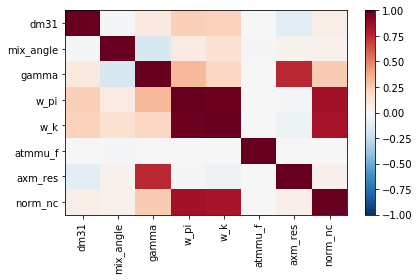

In [15]:
params = []
for param in result_NH["parameters"]:
    if not result_NH["fit_settings"][param][1]:
        params.append(param)
ticks = range(0,len(params))
fig, ax = plt.subplots()
im = ax.imshow(np.transpose(result_NH["corr_matrix"]),cmap='RdBu_r', aspect='auto', interpolation='none', vmin=-1.0, vmax=1.0)
fig.colorbar(im, ax=ax)
ax.grid(False)
ax.set_yticks(ticks)
ax.set_xticks(ticks)
ax.set_xticklabels(params)
ax.set_yticklabels(params)
plt.xticks(rotation=90)
#x0, x1, y0, y1 = plt.axis()
#plt.axis((x0+3.0,x1+3.0, y0, y1))
fig.tight_layout()